In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lead_data = pd.read_csv('/Users/hiteshbehrani/All codes/Lead Scoring assignment/Lead Scoring Assignment/Leads.csv')

In [4]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_data.shape
#9240 rows and 37 columns

(9240, 37)

In [7]:
lead_data.isnull().sum()/len(lead_data)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [8]:
#there are many select values in most of the categorical columns. 
#Could be because the person did not choose any selection
#"select" values are as good as null

In [9]:
lead_data = lead_data.replace('Select', np.nan)

In [10]:
round(lead_data.isnull().sum()/len(lead_data)*100,1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [11]:
#remove the columns which have more than 30% of null values
lead_data = lead_data.drop(columns = ['How did you hear about X Education', 'Tags', 'Specialization', 'Lead Quality', 'Lead Profile', 'City',  
                                      'Asymmetrique Activity Index','Asymmetrique Profile Index',
                                      'Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [12]:
round(lead_data.isnull().sum()/len(lead_data)*100,1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [13]:
#treating each column one by one

<Axes: xlabel='Country', ylabel='Count'>

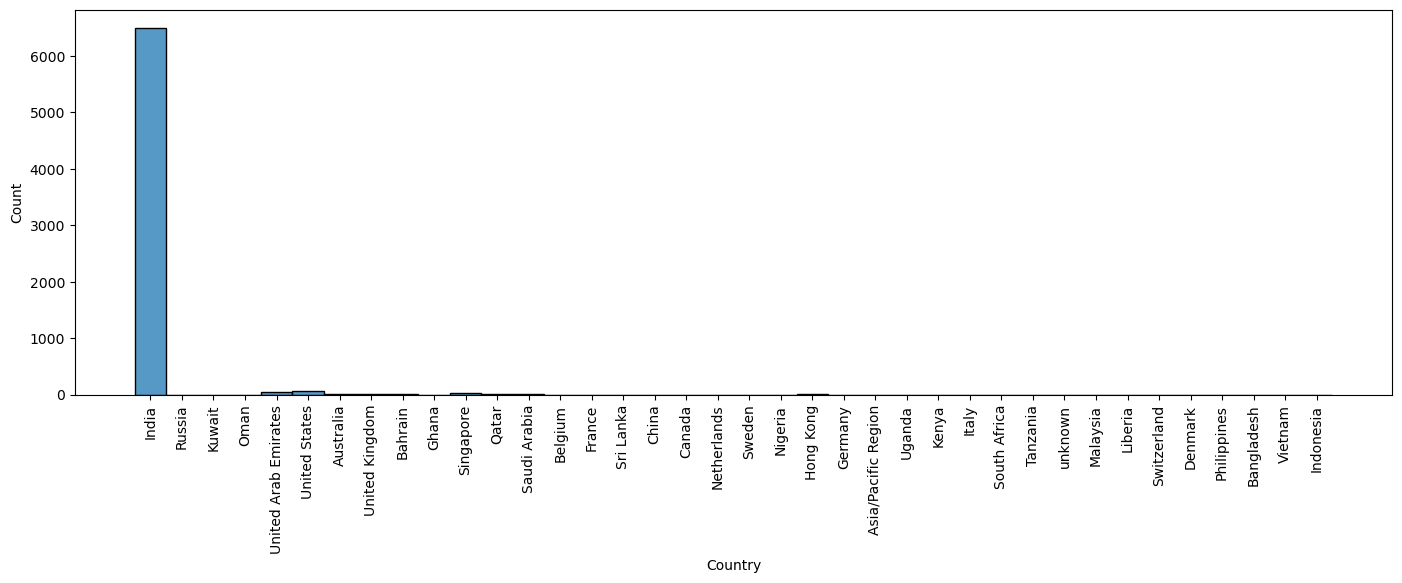

In [14]:
#country
plt.figure(figsize=(17,5))
plt.xticks(rotation=90)
sns.histplot(lead_data['Country'])

In [15]:
#since this column is highly skewed towards "India", lets drop this variable
lead_data.drop(columns = ['Country'], inplace = True)

<Axes: xlabel='What is your current occupation', ylabel='Count'>

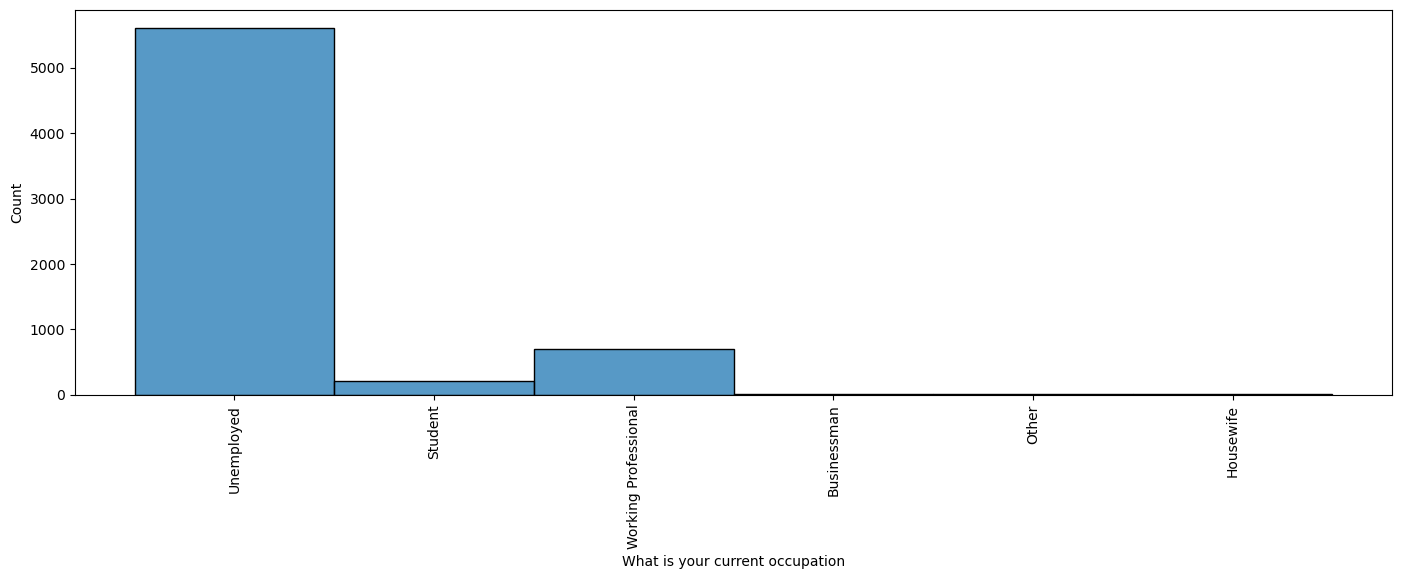

In [16]:
#What is your current occupation
plt.figure(figsize=(17,5))
plt.xticks(rotation=90)
sns.histplot(lead_data['What is your current occupation'])

In [17]:
round(lead_data['What is your current occupation'].value_counts() / len(lead_data)*100)
#61% of the visitors are Unemployed, we we can replace null with "Unemployed"

Unemployed              61.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [18]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,"Unemployed")

In [19]:
lead_data['What is your current occupation'].isnull().sum()

0

In [20]:
#What matters most to you in choosing a course
lead_data['What matters most to you in choosing a course'].value_counts()
#we can replace null with "Better Career Prospects"

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,"Better Career Prospects")

In [22]:
lead_data['What matters most to you in choosing a course'].isnull().sum()

0

In [23]:
#but this column is highly skewed. we should remove this column
lead_data = lead_data.drop(columns = ['What matters most to you in choosing a course'])

In [24]:
#checking the null values in all the remaining columns again
round(lead_data.isnull().sum()/len(lead_data)*100,1)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.4
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.5
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.5
Last Activity                               1.1
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [25]:
#rest all the other columns which have null values are having less than 2%, we will drop those rows
lead_data.dropna(inplace = True)

In [26]:
#checking the null values in all the remaining columns again
round(lead_data.isnull().sum()/len(lead_data)*100,1)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [27]:
round(lead_data.shape[0]/9240*100,1)
#we are able to retain 98.2% of all rows

98.2

In [28]:
(sum(lead_data['Converted'])/len(lead_data))*100
#lead conversion rate is 37.85~38%

37.85541106458012

In [29]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [30]:
for i in lead_data.select_dtypes(include=['object']).columns.tolist():
    print(i)
    print(lead_data[i].value_counts())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64


Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_

In [31]:
#drop columns "do not call", "Search", "Magazine", "News paper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Receive More Updates About Our Courses", "I agree to pay the amount through cheque"

lead_data = lead_data.drop(columns=["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"])

In [32]:
lead_data = lead_data.drop(columns = ["Through Recommendations"])

In [33]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [34]:
for i in lead_data.select_dtypes(include=['object']).columns.tolist():
    print(i)
    print(lead_data[i].value_counts())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64


Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_

In [35]:
#Lead Source
#combine where the count is less than 10

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing', 'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],'Others')

In [36]:
#Last Activity
#combine where the count is less than 10
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

In [37]:
#Last Notable Activity
#combine where the count is less than 10
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

In [38]:
#What is your current occupation
#combine where the count is less than 20
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Other', 'Housewife', 'Businessman'], 'Others')

In [39]:
for i in lead_data.select_dtypes(include=['object']).columns.tolist():
    print(i)
    print(lead_data[i].value_counts())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64


Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                28
Name: Lead Source, dtype: int64


Do Not Email
No     8358
Yes     

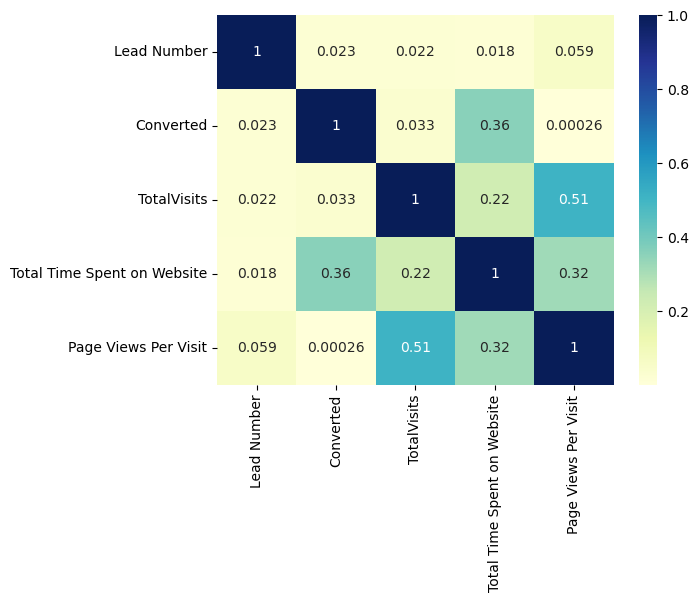

In [40]:
#Checking correlations of numeric values

# heatmap
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [41]:
#checking the spread of numeric variables

<Axes: >

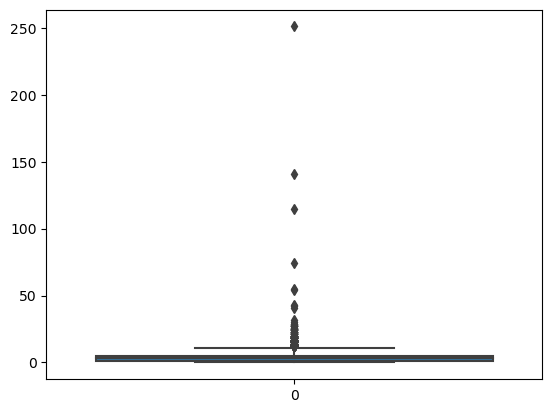

In [42]:
sns.boxplot(lead_data['TotalVisits'])

In [43]:
lead_data['TotalVisits'].describe(percentiles=[0.01, 0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [44]:
#remove the top 1 percentile
top1p = lead_data['TotalVisits'].quantile(0.99)
top1p

17.0

In [45]:
lead_data = lead_data[lead_data['TotalVisits']<=top1p]

<Axes: >

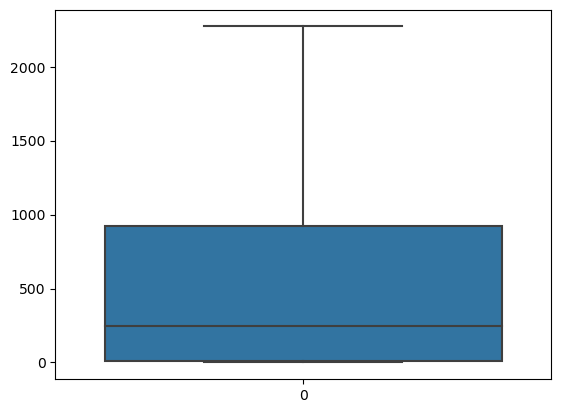

In [46]:
#Total Time Spent on Website
sns.boxplot(lead_data['Total Time Spent on Website'])

In [47]:
lead_data['Total Time Spent on Website'].describe(percentiles=[0.01, 0.05,.25, .5, .75, .90, .95, .99])
#not removing anything

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
1%          0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

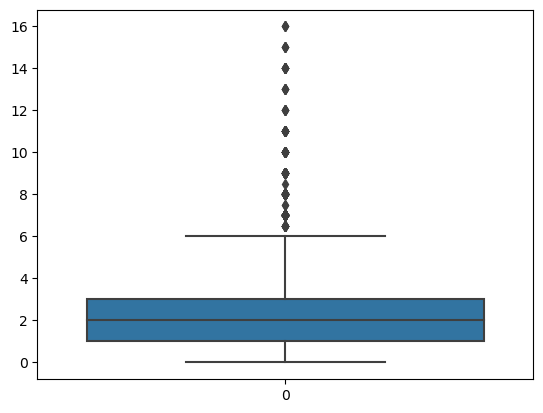

In [48]:
sns.boxplot(lead_data['Page Views Per Visit'])
lead_data['Page Views Per Visit'].describe(percentiles=[0.01, 0.05,.25, .5, .75, .90, .95, .99])

In [49]:
#remove the top 1 percentile
top1p = lead_data['Page Views Per Visit'].quantile(0.99)
top1p

9.0

In [50]:
lead_data = lead_data[lead_data['Page Views Per Visit']<=top1p]

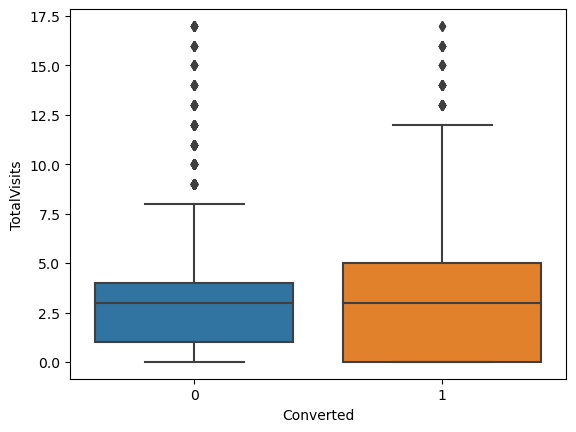

In [51]:
#checking the spread for converted and not converted, for each numerical variable

#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

#this variable might not be significant

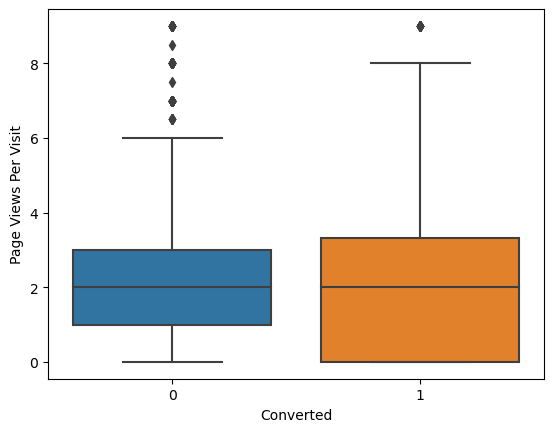

In [52]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

#this variable might not be significant

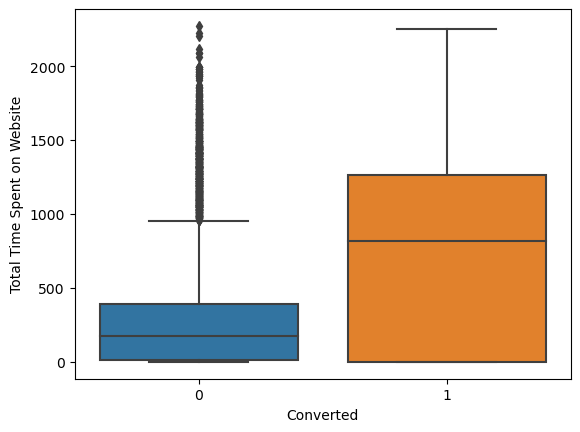

In [53]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

#this variable might be significant

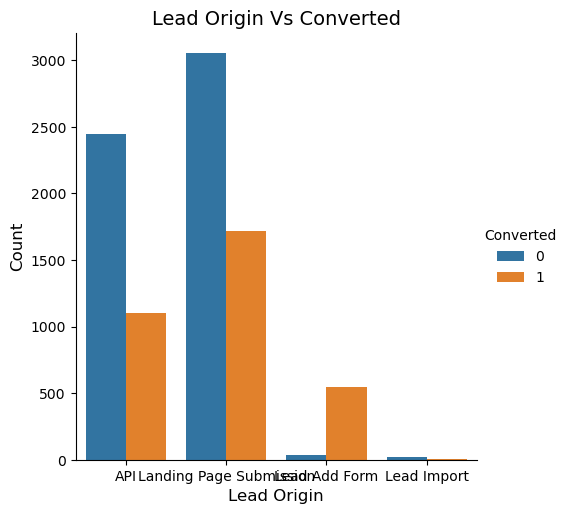

In [63]:
#checking Spread of "Lead Origin" vs Converted variable
sns.catplot(x = 'Lead Origin', hue = 'Converted', kind = 'count', data = lead_data)
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()


#this variable might be significant

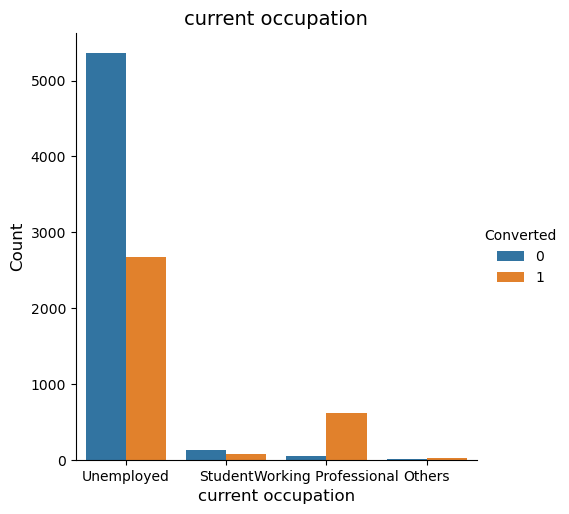

In [64]:
#checking Spread of "What is your current occupation" vs Converted variable
sns.catplot(x = 'What is your current occupation', hue = 'Converted', kind = 'count', data = lead_data)
plt.title('current occupation', fontsize = 14)
plt.xlabel("current occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#this variable might be significant

In [65]:
for i in lead_data.select_dtypes(include=['object']).columns.tolist():
    print(i)
    print(lead_data[i].value_counts())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
acca2e94-1bd6-440c-a606-f049900c425b    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
51c534e0-8913-468b-9214-6487a55e1fae    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 8924, dtype: int64


Lead Origin
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64


Lead Source
Google              2836
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Facebook              31
Others                27
Name: Lead Source, dtype: int64


Do Not Email
No     8235
Yes     

In [66]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [67]:
# these 2 columns are having yes and no. Need to map yes to 1 and no to 0
#Do Not Email
#A free copy of Mastering The Interview

binary_map_list = ['Do Not Email', 'A free copy of Mastering The Interview']
lead_data[binary_map_list] = lead_data[binary_map_list].apply(lambda x : x.map({'Yes':1,"No":0}))

In [68]:
lead_data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened


In [69]:
#other categorical variables have to converted into dummy variables
#checking that after making dummy variables, which column has to be removed
for i in lead_data.select_dtypes(include=['object']).columns.tolist():
    print(i)
    print(lead_data[i].value_counts())
    print('\n')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
acca2e94-1bd6-440c-a606-f049900c425b    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
51c534e0-8913-468b-9214-6487a55e1fae    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 8924, dtype: int64


Lead Origin
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64


Lead Source
Google              2836
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Facebook              31
Others                27
Name: Lead Source, dtype: int64


Last Activity
Email Opened       

In [70]:
dummy = pd.get_dummies(lead_data[['Lead Origin','What is your current occupation']], drop_first=True)

lead_data = pd.concat([lead_data,dummy],1)

In [71]:
dummy = pd.get_dummies(lead_data['Last Activity'], prefix  = 'Last Activity')
dummy.drop(columns = 'Last Activity_Others', inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [72]:
dummy = pd.get_dummies(lead_data['Lead Source'], prefix  = 'Lead Source')
dummy.drop(columns = 'Lead Source_Others', inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [73]:
#Last Notable Activity
dummy = pd.get_dummies(lead_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy.drop(columns = 'Last Notable Activity_Others', inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [74]:
#dropping the original categorical columns
lead_data = lead_data.drop(columns = lead_data.select_dtypes(include=['object']).columns.tolist())

In [75]:
lead_data.drop(columns = 'Lead Number', inplace = True)

In [76]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Train-Test Split & Logistic Regression Model Building

In [77]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_data['Converted']

y.head()

#putting rest of the variables in X
X=lead_data.drop('Converted', axis=1)

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [81]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [82]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [83]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', False, 14),
 ('Last Activity_Unreachable', False, 5),
 ('Last Act

In [85]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [86]:
# Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.2
Date:                Mon, 04 Dec 2023   Deviance:                       5174.4
Time:                        00:46:32   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1127      0.559      0.202      0.840      -0.984       1.209
Do Not Email                                            -1.3532      0.205     -6.595      0.000      -1.755      -0.951
Total Time Spent on Website                              1.1215      0.041     27.552      0.000       1.042       1.201
Lead Origin_Lead Add Form                                2.4617      0.898      2.740      0.006       0.701       4.222
Lead Origin_Lead Import                                  1.3672      0.487      2.808      0.005       0.413       2.321
What is your current occupation_Student                 -1.1515      0.603     -1.908      0.056      -2.334       0.031
What is your current occupation_Unemployed              -1.3730      0.559     -2.457      0.014      -2.468      -0.278
What is your current occupation_Working Professional     1.3550      0.587      2.306      0.021       0.204       2.506
Last Activity_Converted to Lead                         -1.1173      0.228     -4.890      0.000      -1.565      -0.669
Last Activity_Email Bounced                             -0.9136      0.412     -2.216      0.027      -1.722      -0.106
Last Activity_Had a Phone Conversation                   2.0977      1.037      2.024      0.043       0.066       4.129
Last Activity_Olark Chat Conversation                   -1.4336      0.170     -8.452      0.000      -1.766      -1.101
Lead Source_Olark Chat                                   1.1723      0.103     11.371      0.000       0.970       1.374
Lead Source_Reference                                    1.5210      0.925      1.645      0.100      -0.291       3.333
Lead Source_Welingak Website                             3.3186      1.154      2.877      0.004       1.057       5.580
Last Notable Activity_Email Link Clicked                -0.4490      0.254     -1.770      0.077      -0.946       0.048
Last Notable Activity_Had a Phone Conversation          21.4750   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
Last Notable Activity_Modified                          -0.2787      0.092     -3.024      0.002      -0.459      -0.098
Last Notable Activity_Page Visited on Website           -0.3558      0.201     -1.772      0.076      -0.749       0.038
Last Notable Activity_SMS Sent                           1.4751      0.088     16.721      0.000       1.302       1.648
Last Notable Activity_Unreachable                        1.7249      0.597      2.891      0.004       0.555       2.894
========================================================================================================================
"""

In [87]:
#remove - Last Notable Activity_Had a Phone Conversation
X_train_sm = X_train_sm.drop('Last Notable Activity_Had a Phone Conversation', axis = 1)

In [88]:
# Model 2
#X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.5
Date:                Mon, 04 Dec 2023   Deviance:                       5177.0
Time:                        00:46:33   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1169      0.559      0.209      0.835      -0.979       1.213
Do Not Email                                            -1.3600      0.205     -6.629      0.000      -1.762      -0.958
Total Time Spent on Website                              1.1211      0.041     27.545      0.000       1.041       1.201
Lead Origin_Lead Add Form                                2.4607      0.898      2.739      0.006       0.700       4.221
Lead Origin_Lead Import                                  1.3663      0.487      2.806      0.005       0.412       2.321
What is your current occupation_Student                 -1.1536      0.603     -1.912      0.056      -2.336       0.029
What is your current occupation_Unemployed              -1.3745      0.559     -2.460      0.014      -2.470      -0.279
What is your current occupation_Working Professional     1.3525      0.587      2.302      0.021       0.201       2.504
Last Activity_Converted to Lead                         -1.1131      0.228     -4.872      0.000      -1.561      -0.665
Last Activity_Email Bounced                             -0.9050      0.412     -2.195      0.028      -1.713      -0.097
Last Activity_Had a Phone Conversation                   3.0535      0.877      3.480      0.001       1.334       4.773
Last Activity_Olark Chat Conversation                   -1.4309      0.170     -8.437      0.000      -1.763      -1.098
Lead Source_Olark Chat                                   1.1715      0.103     11.364      0.000       0.969       1.374
Lead Source_Reference                                    1.5215      0.925      1.645      0.100      -0.291       3.334
Lead Source_Welingak Website                             3.3211      1.154      2.879      0.004       1.060       5.583
Last Notable Activity_Email Link Clicked                -0.4513      0.254     -1.780      0.075      -0.948       0.046
Last Notable Activity_Modified                          -0.2852      0.092     -3.097      0.002      -0.466      -0.105
Last Notable Activity_Page Visited on Website           -0.3577      0.201     -1.782      0.075      -0.751       0.036
Last Notable Activity_SMS Sent                           1.4731      0.088     16.703      0.000       1.300       1.646
Last Notable Activity_Unreachable                        1.7222      0.597      2.887      0.004       0.553       2.892
========================================================================================================================
"""

In [89]:
#remove - Lead Source_Reference
X_train_sm = X_train_sm.drop('Lead Source_Reference', axis = 1)

In [90]:
# Model 3
#X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.6
Date:                Mon, 04 Dec 2023   Deviance:                       5179.3
Time:                        00:46:33   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1183      0.559      0.212      0.832      -0.977       1.214
Do Not Email                                            -1.3567      0.205     -6.622      0.000      -1.758      -0.955
Total Time Spent on Website                              1.1204      0.041     27.525      0.000       1.041       1.200
Lead Origin_Lead Add Form                                3.9157      0.226     17.302      0.000       3.472       4.359
Lead Origin_Lead Import                                  1.3655      0.487      2.804      0.005       0.411       2.320
What is your current occupation_Student                 -1.1512      0.603     -1.910      0.056      -2.333       0.030
What is your current occupation_Unemployed              -1.3763      0.558     -2.465      0.014      -2.471      -0.282
What is your current occupation_Working Professional     1.3525      0.587      2.304      0.021       0.202       2.503
Last Activity_Converted to Lead                         -1.1143      0.228     -4.878      0.000      -1.562      -0.667
Last Activity_Email Bounced                             -0.9084      0.412     -2.204      0.028      -1.716      -0.101
Last Activity_Had a Phone Conversation                   3.0529      0.877      3.481      0.000       1.334       4.772
Last Activity_Olark Chat Conversation                   -1.4302      0.170     -8.434      0.000      -1.763      -1.098
Lead Source_Olark Chat                                   1.1692      0.103     11.338      0.000       0.967       1.371
Lead Source_Welingak Website                             1.8642      0.756      2.465      0.014       0.382       3.346
Last Notable Activity_Email Link Clicked                -0.4459      0.253     -1.762      0.078      -0.942       0.050
Last Notable Activity_Modified                          -0.2836      0.092     -3.081      0.002      -0.464      -0.103
Last Notable Activity_Page Visited on Website           -0.3604      0.201     -1.792      0.073      -0.754       0.034
Last Notable Activity_SMS Sent                           1.4742      0.088     16.719      0.000       1.301       1.647
Last Notable Activity_Unreachable                        1.7242      0.596      2.892      0.004       0.556       2.893
========================================================================================================================
"""

In [91]:
#Remove - Last Notable Activity_Email Link Clicked
X_train_sm = X_train_sm.drop('Last Notable Activity_Email Link Clicked', axis = 1)

In [92]:
# Model 4
#X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Mon, 04 Dec 2023   Deviance:                       5182.5
Time:                        00:46:33   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1053      0.559      0.188      0.851      -0.990       1.200
Do Not Email                                            -1.3559      0.205     -6.619      0.000      -1.757      -0.954
Total Time Spent on Website                              1.1220      0.041     27.572      0.000       1.042       1.202
Lead Origin_Lead Add Form                                3.9057      0.226     17.277      0.000       3.463       4.349
Lead Origin_Lead Import                                  1.3809      0.487      2.837      0.005       0.427       2.335
What is your current occupation_Student                 -1.1509      0.603     -1.910      0.056      -2.332       0.030
What is your current occupation_Unemployed              -1.3851      0.558     -2.482      0.013      -2.479      -0.291
What is your current occupation_Working Professional     1.3445      0.587      2.291      0.022       0.194       2.495
Last Activity_Converted to Lead                         -1.1157      0.228     -4.883      0.000      -1.564      -0.668
Last Activity_Email Bounced                             -0.9024      0.412     -2.190      0.029      -1.710      -0.095
Last Activity_Had a Phone Conversation                   3.0632      0.876      3.495      0.000       1.345       4.781
Last Activity_Olark Chat Conversation                   -1.4176      0.169     -8.365      0.000      -1.750      -1.085
Lead Source_Olark Chat                                   1.1584      0.103     11.267      0.000       0.957       1.360
Lead Source_Welingak Website                             1.8659      0.756      2.467      0.014       0.384       3.348
Last Notable Activity_Modified                          -0.2617      0.091     -2.865      0.004      -0.441      -0.083
Last Notable Activity_Page Visited on Website           -0.3380      0.201     -1.684      0.092      -0.732       0.055
Last Notable Activity_SMS Sent                           1.4979      0.087     17.159      0.000       1.327       1.669
Last Notable Activity_Unreachable                        1.7462      0.596      2.929      0.003       0.578       2.915
========================================================================================================================
"""

In [93]:
#Remove - Last Notable Activity_Page Visited on Website
X_train_sm = X_train_sm.drop('Last Notable Activity_Page Visited on Website', axis = 1)

In [94]:
# Model 5
#X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.7
Date:                Mon, 04 Dec 2023   Deviance:                       5185.5
Time:                        00:46:33   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0924      0.558      0.166      0.869      -1.002       1.187
Do Not Email                                            -1.3716      0.204     -6.722      0.000      -1.772      -0.972
Total Time Spent on Website                              1.1199      0.041     27.558      0.000       1.040       1.200
Lead Origin_Lead Add Form                                3.9131      0.226     17.306      0.000       3.470       4.356
Lead Origin_Lead Import                                  1.3965      0.487      2.869      0.004       0.443       2.351
What is your current occupation_Student                 -1.1632      0.602     -1.932      0.053      -2.344       0.017
What is your current occupation_Unemployed              -1.3985      0.558     -2.507      0.012      -2.492      -0.305
What is your current occupation_Working Professional     1.3319      0.586      2.271      0.023       0.183       2.481
Last Activity_Converted to Lead                         -1.1131      0.228     -4.873      0.000      -1.561      -0.665
Last Activity_Email Bounced                             -0.8786      0.411     -2.135      0.033      -1.685      -0.072
Last Activity_Had a Phone Conversation                   3.0786      0.877      3.512      0.000       1.360       4.797
Last Activity_Olark Chat Conversation                   -1.4117      0.169     -8.332      0.000      -1.744      -1.080
Lead Source_Olark Chat                                   1.1606      0.103     11.288      0.000       0.959       1.362
Lead Source_Welingak Website                             1.8625      0.756      2.462      0.014       0.380       3.345
Last Notable Activity_Modified                          -0.2369      0.090     -2.625      0.009      -0.414      -0.060
Last Notable Activity_SMS Sent                           1.5245      0.086     17.735      0.000       1.356       1.693
Last Notable Activity_Unreachable                        1.7723      0.596      2.974      0.003       0.604       2.940
========================================================================================================================
"""

In [95]:
#Remove - What is your current occupation_Student
X_train_sm = X_train_sm.drop('What is your current occupation_Student', axis = 1)

In [96]:
# Model 6
#X_train_sm =sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.7
Date:                Mon, 04 Dec 2023   Deviance:                       5189.3
Time:                        00:46:33   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8958      0.213     -4.207      0.000      -1.313      -0.478
Do Not Email                                            -1.3639      0.203     -6.707      0.000      -1.762      -0.965
Total Time Spent on Website                              1.1213      0.041     27.598      0.000       1.042       1.201
Lead Origin_Lead Add Form                                3.9107      0.226     17.305      0.000       3.468       4.354
Lead Origin_Lead Import                                  1.3961      0.487      2.869      0.004       0.442       2.350
What is your current occupation_Unemployed              -0.4107      0.211     -1.943      0.052      -0.825       0.004
What is your current occupation_Working Professional     2.3205      0.278      8.351      0.000       1.776       2.865
Last Activity_Converted to Lead                         -1.1256      0.228     -4.930      0.000      -1.573      -0.678
Last Activity_Email Bounced                             -0.9049      0.411     -2.201      0.028      -1.711      -0.099
Last Activity_Had a Phone Conversation                   3.0742      0.876      3.509      0.000       1.357       4.791
Last Activity_Olark Chat Conversation                   -1.4173      0.169     -8.369      0.000      -1.749      -1.085
Lead Source_Olark Chat                                   1.1569      0.103     11.260      0.000       0.956       1.358
Lead Source_Welingak Website                             1.8619      0.756      2.462      0.014       0.380       3.344
Last Notable Activity_Modified                          -0.2299      0.090     -2.552      0.011      -0.406      -0.053
Last Notable Activity_SMS Sent                           1.5231      0.086     17.713      0.000       1.355       1.692
Last Notable Activity_Unreachable                        1.7727      0.596      2.974      0.003       0.605       2.941
========================================================================================================================
"""

In [97]:
#Remove - What is your current occupation_Student
X_train_sm = X_train_sm.drop('What is your current occupation_Unemployed', axis = 1)

In [98]:
# Model 7
#X_train_sm =sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.5
Date:                Mon, 04 Dec 2023   Deviance:                       5193.0
Time:                        00:46:33   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2935      0.060    -21.616      0.000      -1.411      -1.176
Do Not Email                                            -1.3665      0.204     -6.713      0.000      -1.765      -0.967
Total Time Spent on Website                              1.1218      0.041     27.613      0.000       1.042       1.201
Lead Origin_Lead Add Form                                3.9273      0.226     17.392      0.000       3.485       4.370
Lead Origin_Lead Import                                  1.3849      0.486      2.847      0.004       0.431       2.338
What is your current occupation_Working Professional     2.7187      0.188     14.459      0.000       2.350       3.087
Last Activity_Converted to Lead                         -1.1248      0.228     -4.925      0.000      -1.572      -0.677
Last Activity_Email Bounced                             -0.8822      0.411     -2.147      0.032      -1.687      -0.077
Last Activity_Had a Phone Conversation                   3.0626      0.876      3.495      0.000       1.345       4.780
Last Activity_Olark Chat Conversation                   -1.4106      0.169     -8.337      0.000      -1.742      -1.079
Lead Source_Olark Chat                                   1.1592      0.103     11.283      0.000       0.958       1.361
Lead Source_Welingak Website                             1.8363      0.756      2.429      0.015       0.354       3.318
Last Notable Activity_Modified                          -0.2316      0.090     -2.572      0.010      -0.408      -0.055
Last Notable Activity_SMS Sent                           1.5149      0.086     17.655      0.000       1.347       1.683
Last Notable Activity_Unreachable                        1.7594      0.596      2.952      0.003       0.591       2.928
========================================================================================================================
"""

### Checking VIF values

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.03
7,Last Activity_Email Bounced,1.75
1,Do Not Email,1.71
12,Last Notable Activity_Modified,1.55
10,Lead Source_Olark Chat,1.44
3,Lead Origin_Lead Add Form,1.43
9,Last Activity_Olark Chat Conversation,1.41
2,Total Time Spent on Website,1.31
11,Lead Source_Welingak Website,1.27
13,Last Notable Activity_SMS Sent,1.26


In [101]:
#Making Prediction on the Train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.567630
6138    0.712046
8650    0.939768
3423    0.059420
6552    0.246066
1696    0.118928
2110    0.901542
6830    0.018497
2581    0.320580
5927    0.104136
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.567630,6676
1,1,0.712046,6138
2,1,0.939768,8650
3,0,0.059420,3423
4,0,0.246066,6552


### choosing 0.5 as the cutoff probability point

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_prob'].map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.567630,6676,1
1,1,0.712046,6138,1
2,1,0.939768,8650,1
3,0,0.059420,3423,0
4,0,0.246066,6552,0


In [105]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3417  454]
 [ 702 1673]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8149215497918668


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.704421052631579

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8827176440196332

In [110]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11728235598036683


In [111]:
# positive predictive value 
print (TP / float(TP+FP))


0.7865538316878232


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8295702840495266


In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )



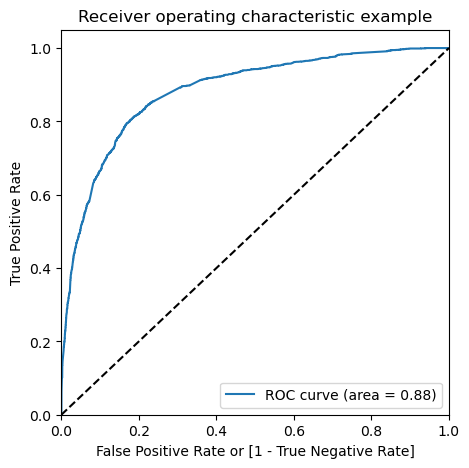

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
#Since area under the curve is 0.88 , therefore our model is a good

In [116]:
#Finding the optimal cutoff point. Previously we took arbitrary cutoff point of 0.5, but this can be better

# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.01,0.02,0.03,0.04,0.05,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,1,0.567630,6676,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.712046,6138,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.939768,8650,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
3,0,0.059420,3423,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.246066,6552,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/100 for x in range(100)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.380243  1.000000  0.000000
0.01  0.01  0.385527  1.000000  0.008525
0.02  0.02  0.403298  1.000000  0.037200
0.03  0.03  0.434678  0.998737  0.088608
0.04  0.04  0.456132  0.996211  0.124774
...    ...       ...       ...       ...
0.95  0.95  0.688601  0.192421  0.993025
0.96  0.96  0.673231  0.145684  0.996900
0.97  0.97  0.666507  0.126737  0.997675
0.98  0.98  0.655940  0.096842  0.998967
0.99  0.99  0.642011  0.058947  0.999742

[100 rows x 4 columns]


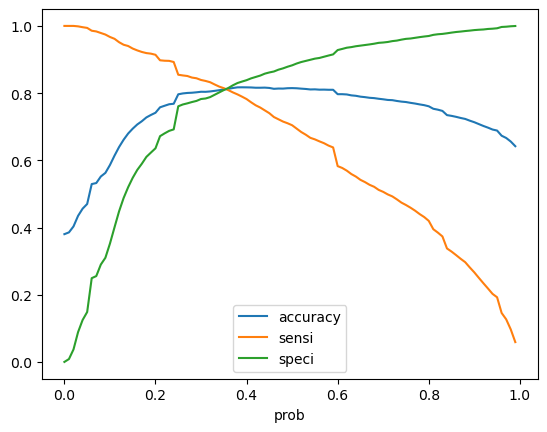

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
#optimal cuttoff point can be 0.36

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x >= 0.36 else 0)

In [121]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.01,0.02,0.03,0.04,0.05,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,final_predicted
0,1,0.567630,6676,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0.712046,6138,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0.939768,8650,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
3,0,0.059420,3423,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.246066,6552,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8128402177393532


In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3417  454]
 [ 702 1673]]


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Sensitivity:  0.704421052631579
Specificity:  0.8827176440196332


- Accuracy is 81.2%
- ROC is 0.88

### working on the test set now

In [125]:
#selecting the numeric columns
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

In [126]:
#transforming them based on train fit
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [127]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
7625,-0.297688,-0.397342,2.145058,-0.164140,1.446506,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5207,-0.297688,0.277837,0.772700,0.876565,1.446506,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2390,-0.297688,-1.072521,-0.885722,-1.204846,-0.691321,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4362,-0.297688,-0.397342,-0.451952,-0.164140,-0.691321,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1023,-0.297688,3.991321,-0.293028,1.396918,-0.691321,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [128]:
final_col = X_train_sm.columns[1:] #select all columns except from constant, which we will add late

In [129]:
final_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [130]:
X_test[final_col].head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7625,-0.297688,2.145058,0,0,0,0,0,0,0,0,0,0,0,0
5207,-0.297688,0.772700,0,0,0,0,0,0,0,0,0,0,0,0
2390,-0.297688,-0.885722,1,0,0,0,0,0,0,0,0,0,1,0
4362,-0.297688,-0.451952,0,0,0,0,0,0,0,0,0,0,1,0
1023,-0.297688,-0.293028,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test[final_col])

#### Predictions on Test set

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
#converting predict y to data frame
y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
y_pred_1.head()

,0
7625,0.820488
5207,0.495025
2390,0.972397
4362,0.530248
1023,0.228735


In [135]:
#converting y_test to data frame
y_test_df = pd.DataFrame(y_test)

In [136]:
y_test_df.head()

,Converted
7625,0
5207,1
2390,1
4362,0
1023,0


In [137]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes (y test predicted dataframe and y test dataframe) to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final.head(2)

,Converted,Prospect ID,0
0,0,7625,0.820488
1,1,5207,0.495025


In [141]:
# Renaming the column 0 to "Converted_prob"
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [142]:
y_pred_final.head(2)

,Converted,Prospect ID,Converted_prob
0,0,7625,0.820488
1,1,5207,0.495025


In [143]:
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_prob']]
y_pred_final['Lead_score'] = y_pred_final['Converted_prob'].apply(lambda x: round(x*100))

In [144]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score
0,7625,0,0.820488,82
1,5207,1,0.495025,50
2,2390,1,0.972397,97
3,4362,0,0.530248,53
4,1023,0,0.228735,23


In [145]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x >= 0.36 else 0)

In [146]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score,final_Predicted
0,7625,0,0.820488,82,1
1,5207,1,0.495025,50,1
2,2390,1,0.972397,97,1
3,4362,0,0.530248,53,1
4,1023,0,0.228735,23,0


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7882748319641524

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1290,  394],
       [ 173,  821]])

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# sensitivity of model
TP / float(TP+FN)

0.8259557344064387

In [151]:
# specificity of model
TN / float(TN+FP)

0.7660332541567696

In [152]:
from sklearn.metrics import precision_score, recall_score

In [153]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6757201646090535

In [154]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8259557344064387

Sensitivity, Specificity and Accuracy of train and test set are very similar to each other. So the model is robust. 